In [1]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [3]:
#{"username":"thekatle","key":"6414373099739e188807c1db9aa4c30c"}
import opendatasets as od
import pandas as pd
od.download(
    "https://www.kaggle.com/datasets/ubitquitin/geolocation-geoguessr-images-50k")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thekatle
Your Kaggle Key: ··········


100%|██████████| 6.66G/6.66G [00:56<00:00, 128MB/s]


In [4]:
import os
#root path
root = '/content/geolocation-geoguessr-images-50k/compressed_dataset'

kaggleDict = {}
for subdir, dirs, files in os.walk(root):    
    for file in files:
        key, value = os.path.basename(subdir), file  #Get basefolder name & file name
        kaggleDict.setdefault(key, []).append(value)          #Form DICT

In [5]:
print(kaggleDict['France'])

['canvas_1630083817.jpg', 'canvas_1629408998.jpg', 'canvas_1630096176.jpg', 'canvas_1629547514.jpg', 'canvas_1629393636.jpg', 'canvas_1629708836.jpg', 'canvas_1630057047.jpg', 'canvas_1629789407.jpg', 'canvas_1630055533.jpg', 'canvas_1629940701.jpg', 'canvas_1629744797.jpg', 'canvas_1630219457.jpg', 'canvas_1629786196.jpg', 'canvas_1629790465.jpg', 'canvas_1629388017.jpg', 'canvas_1630271307.jpg', 'canvas_1629777900.jpg', 'canvas_1630102165.jpg', 'canvas_1630278151.jpg', 'canvas_1629279435.jpg', 'canvas_1629992757.jpg', 'canvas_1629262877.jpg', 'canvas_1629899574.jpg', 'canvas_1629849198.jpg', 'canvas_1629698707.jpg', 'canvas_1629515263.jpg', 'canvas_1630075194.jpg', 'canvas_1629542930.jpg', 'canvas_1630068537.jpg', 'canvas_1629301976.jpg', 'canvas_1630259943.jpg', 'canvas_1629411310.jpg', 'canvas_1629965478.jpg', 'canvas_1629479207.jpg', 'canvas_1629969572.jpg', 'canvas_1629715148.jpg', 'canvas_1629751585.jpg', 'canvas_1629535904.jpg', 'canvas_1629839070.jpg', 'canvas_1629550464.jpg',

In [6]:
kaggleSet = {
    key: value for (key, value) in kaggleDict.items() if len(kaggleDict[key])> 2000 
}

In [7]:
for key,value in kaggleSet.items():
  print("Country: "+key+", Size: "+str(len(value)));

Country: Brazil, Size: 2320
Country: United Kingdom, Size: 2484
Country: United States, Size: 12014
Country: France, Size: 3573
Country: Japan, Size: 3840


In [8]:
usSet = kaggleSet['United States']
brazilSet = kaggleSet['Brazil']
japanSet = kaggleSet['Japan']
ukSet = kaggleSet['United Kingdom']
franceSet = kaggleSet['France']

print(usSet[0])

canvas_1629827067.jpg


In [9]:
import random
random.seed(10)
numSelect = 1000

for img in range(len(usSet)):
  usSet[img] = root+ '/United States/'+ usSet[img]
for img in range(len(brazilSet)):
  brazilSet[img] = root+ '/Brazil/'+ brazilSet[img]
for img in range(len(japanSet)):
  japanSet[img] = root+ '/Japan/'+ japanSet[img]
for img in range(len(ukSet)):
  ukSet[img] = root+ '/United Kingdom/'+ ukSet[img]
for img in range(len(franceSet)):
  franceSet[img] = root+ '/France/'+ franceSet[img]

usFiles = random.sample(usSet,numSelect)
brazilFiles = random.sample(brazilSet,numSelect)
japanFiles = random.sample(japanSet,numSelect)
ukFiles = random.sample(ukSet,numSelect)
franceFiles = random.sample(franceSet,numSelect)

print(usFiles[0])

/content/geolocation-geoguessr-images-50k/compressed_dataset/United States/canvas_1629400869.jpg


In [10]:
import torch
import glob
from torch.utils.data import random_split

countries = list(kaggleSet.keys())
#print(countries)
img_files = usFiles + brazilFiles + japanFiles + ukFiles + franceFiles

#print(len(img_files))
idx_to_class = {i:j for i, j in enumerate(countries)}
print(idx_to_class)
class_to_idx = {value:key for key,value in idx_to_class.items()}
print(class_to_idx)

#random split
train_idx,val_idx,test_idx=random_split(img_files, [0.6, 0.2, 0.2], generator=torch.Generator().manual_seed(42))
    
train_list=[img_files[i] for i in train_idx.indices]
test_list=[img_files[i] for i in test_idx.indices]
val_list=[img_files[i] for i in val_idx.indices]

print(len(train_idx.indices),len(test_idx.indices),len(val_idx.indices))
print(len(train_list),len(test_list),len(val_list))   

{0: 'Brazil', 1: 'United Kingdom', 2: 'United States', 3: 'France', 4: 'Japan'}
{'Brazil': 0, 'United Kingdom': 1, 'United States': 2, 'France': 3, 'Japan': 4}
3000 1000 1000
3000 1000 1000


In [11]:
print(train_list[0])

/content/geolocation-geoguessr-images-50k/compressed_dataset/Japan/canvas_1629480909.jpg


In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
rootPath = '/content/gdrive/MyDrive/Colab Notebooks/project/geoguessr'

if not os.path.isdir(rootPath):
  os.makedirs(rootPath)

train_path = rootPath+'/train_set'
test_path = rootPath+'/test_set'
valid_path = rootPath+'/validation_set'

if not os.path.isdir(train_path):
  os.makedirs(train_path)

if not os.path.isdir(test_path):
  os.makedirs(test_path)

if not os.path.isdir(valid_path):
  os.makedirs(valid_path)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
import shutil
#rootPath = '/content/gdrive/MyDrive/Colab Notebooks/project/geoguessr'
print(countries)

for subdir, dirs, files in os.walk(root):
    #print('going in')
    #print(subdir)
    for file in files:
        #if 'United States' in subdir or 'Brazil' in subdir or 'Japan' in subdir or 'United Kingdom' in subdir or 'France' in subdir:
          for i in range(len(train_list)):
            #print(train_list[i])
            if train_list[i] == os.path.join(subdir,file):

              if 'United States' in subdir:
                class_type = 'United States'
              elif 'Brazil' in subdir:
                class_type = 'Brazil'
              elif 'Japan' in subdir:
                class_type = 'Japan'
              elif 'United Kingdom' in subdir:
                class_type = 'United Kingdom'
              else:
                class_type='France'

              path_name = os.path.join(train_path,class_type)
              #print(path_name)
              #print(train_list[i])

              if not os.path.exists(path_name):
                os.makedirs(path_name)
              shutil.copy(train_list[i], path_name)

          for i in range(len(test_list)):
            
            if test_list[i] == os.path.join(subdir,file):
              
              if 'United States' in subdir:
                class_type = 'United States'
              elif 'Brazil' in subdir:
                class_type = 'Brazil'
              elif 'Japan' in subdir:
                class_type = 'Japan'
              elif 'United Kingdom' in subdir:
                class_type = 'United Kingdom'
              else:
                class_type='France'

              path_name = os.path.join(test_path,class_type)
              #print(path_name)

              if not os.path.exists(path_name):
                os.makedirs(path_name)
              shutil.copy(test_list[i], path_name)

          for i in range(len(val_list)):
            if val_list[i] == os.path.join(subdir,file):
              if 'United States' in subdir:
                class_type = 'United States'
              elif 'Brazil' in subdir:
                class_type = 'Brazil'
              elif 'Japan' in subdir:
                class_type = 'Japan'
              elif 'United Kingdom' in subdir:
                class_type = 'United Kingdom'
              else:
                class_type='France'

              path_name = os.path.join(valid_path,class_type)
              #print(path_name)

              if not os.path.exists(path_name):
                os.makedirs(path_name)
              shutil.copy(val_list[i], path_name)

['Brazil', 'United Kingdom', 'United States', 'France', 'Japan']


In [27]:
import torchvision
import torchvision.transforms as transforms
import torch.utils.data
import torchvision.datasets as datasets
#seems the default size is 1536 x 662 from Kaggle

dataset_transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((200,200)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

geoguessr = '/content/gdrive/MyDrive/Colab Notebooks/project/geoguessr'
train_path = geoguessr+'/train_set'
test_path = geoguessr+'/test_set'
valid_path = geoguessr+'/validation_set'

dataset = datasets.ImageFolder(root=geoguessr, transform=dataset_transforms)

train_dataset = torchvision.datasets.ImageFolder(train_path,transform=dataset_transforms)
val_dataset = torchvision.datasets.ImageFolder(valid_path,transform=dataset_transforms)
test_dataset = torchvision.datasets.ImageFolder(test_path,transform=dataset_transforms)

batch_size = 30;
num_workers = 0;

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

valid_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

print("Done")

Done


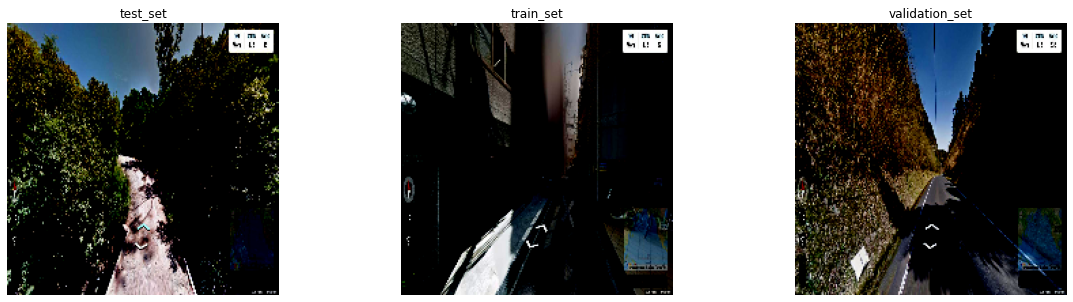

Number of training images: 2941
Number of validation images: 979
Number of testing images: 979


In [28]:
# import matplotlib.pyplot as plt
# import numpy as np
classes = dataset.classes
fig, axis = plt.subplots(1, len(classes), figsize=(20, 5))

for i in range(len(classes)):
    # Get the indices of the images that belong to the current class
    indices = np.where(np.array(dataset.targets) == i)[0]
    # Choose a random index from the indices
    idx = np.random.choice(indices)
    # Get the corresponding image and label
    img, label = dataset[idx]
    # Plot the image and label it with the class name
    axis[i].imshow(img.permute(1, 2, 0))
    axis[i].set_title(classes[label])
    axis[i].axis("off")

plt.show()

print(f"Number of training images: {len(train_dataset)}")
print(f"Number of validation images: {len(val_dataset)}")
print(f"Number of testing images: {len(test_dataset)}")

In [29]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.name = "cnn"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 47 * 47, num_classes*2)
        self.fc2 = nn.Linear(num_classes*2, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 47 * 47)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x  

In [30]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [31]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        output = model(imgs)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [32]:
def train(model, train_loader, valid_loader, batch_size=32, learning_rate = 0.001, num_epochs=30):
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Cross Entropy Loss and the optimizer will be Adam
    # These two were selected because:
    # Cross Entropy Loss - Penalizes the model more heavily when it makes larger errors, which is desirable for image classification
    # Adam - Converges faster than other optimization algorithms, which is important for large-scale image classification
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    ########################################################################
    # Set up some numpy arrays to store the training/test accuracy
    train_acc = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    print ("Training Started...")
    n = 0 # Iteration number
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        for imgs, labels in iter(train_loader):
            
            if torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            # Forward pass, backward pass, and optimize
            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            # Zero the parameter gradients
            optimizer.zero_grad()
            n += 1          
        
        # Get accuracy
        train_acc[epoch] = get_accuracy(model, train_loader)
        val_acc[epoch] = get_accuracy(model, valid_loader)

        print(("Epoch {}: Train acc: {} |" + "Validation acc: {}").format(epoch, train_acc[epoch], val_acc[epoch]))

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
            
    epochs = np.arange(1, num_epochs + 1)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    
    return train_acc, val_acc, epochs
     

In [33]:
def plot_curve(acc, epochs, curve_name):
  plt.plot(epochs, acc)
  plt.title(curve_name + " Curve (Default Parameters)")
  plt.xlabel("Epochs")
  plt.ylabel(curve_name + " Accuracy")
  plt.show()
  return

In [21]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



Training Started...
Epoch 0: Train acc: 0.3264195851751105 |Validation acc: 0.3176710929519918
Epoch 1: Train acc: 0.37096225773546415 |Validation acc: 0.33299284984678246
Epoch 2: Train acc: 0.393403604216253 |Validation acc: 0.32277834525025534
Epoch 3: Train acc: 0.3872832369942196 |Validation acc: 0.32277834525025534
Epoch 4: Train acc: 0.5079904794287657 |Validation acc: 0.39734422880490294
Epoch 5: Train acc: 0.5630737844270656 |Validation acc: 0.39325842696629215
Epoch 6: Train acc: 0.6188371302278136 |Validation acc: 0.39734422880490294
Epoch 7: Train acc: 0.7092825569534172 |Validation acc: 0.41266598569969354
Epoch 8: Train acc: 0.7589255355321319 |Validation acc: 0.39427987742594484
Epoch 9: Train acc: 0.7762665759945597 |Validation acc: 0.3830439223697651
Epoch 10: Train acc: 0.8374702482148929 |Validation acc: 0.38508682328907046
Epoch 11: Train acc: 0.8650119007140429 |Validation acc: 0.39632277834525026
Epoch 12: Train acc: 0.8962937776266576 |Validation acc: 0.361593462

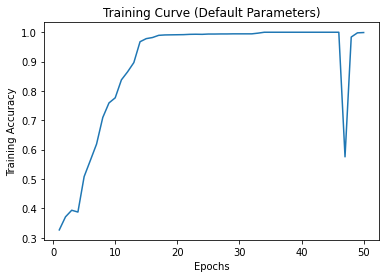

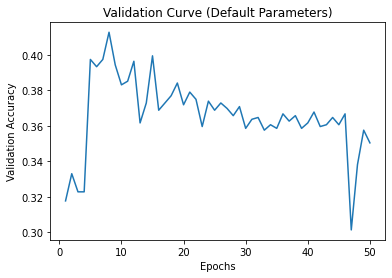

In [35]:
model_1 = CNN(5)
if torch.cuda.is_available():
    model_1.cuda()
train_acc_default, val_acc_default, epochs_default = train(model_1, train_loader, valid_loader, batch_size = 50,learning_rate=0.0005,num_epochs = 50)
plot_curve(train_acc_default, epochs_default, "Training")
plot_curve(val_acc_default, epochs_default, "Validation")

In [ ]:
model_default = CNN(5)
if torch.cuda.is_available():
    model_default.cuda()
train_acc_default, val_acc_default, epochs_default = train(model_default, train_loader, valid_loader)
plot_curve(train_acc_default, epochs_default, "Training")
plot_curve(val_acc_default, epochs_default, "Validation")

Training Started...
Epoch 0: Train acc: 0.29003740224413466 |Validation acc: 0.27681307456588355
Epoch 1: Train acc: 0.2740564433866032 |Validation acc: 0.26251276813074564
Epoch 2: Train acc: 0.36416184971098264 |Validation acc: 0.28907048008171604
Epoch 3: Train acc: 0.45290717443046585 |Validation acc: 0.3176710929519918
Epoch 4: Train acc: 0.5433526011560693 |Validation acc: 0.32073544433094997
Epoch 5: Train acc: 0.6695001700102006 |Validation acc: 0.33605720122574056
Epoch 6: Train acc: 0.7171030261815708 |Validation acc: 0.31562819203268644
Epoch 7: Train acc: 0.7830669840190412 |Validation acc: 0.32482124616956076
Epoch 8: Train acc: 0.8418905134308059 |Validation acc: 0.34627170582226763
Epoch 9: Train acc: 0.8860931655899354 |Validation acc: 0.3350357507660878
Epoch 10: Train acc: 0.9143148588915335 |Validation acc: 0.32175689479060265
Epoch 11: Train acc: 0.9302958177490649 |Validation acc: 0.3237997957099081
Epoch 12: Train acc: 0.9377762665759946 |Validation acc: 0.3217568